# Final Project - Group 1

# Firebase for Homicide and Violent Crime

In [1]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [2]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output, State
import flask
import urllib.parse
import warnings
warnings.filterwarnings("ignore")

## Web scraping using pandas with a specific table for homicide data

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate#By_country,_region,_or_dependent_territory'
tables = pd.read_html(url)
homicide_data = tables[1]

# Firebase Realtime Database URL for homicide data
firebase_url = 'https://python-project-ee874-default-rtdb.firebaseio.com/'


# Clear existing data in Firebase for violent crime data
requests.delete(f'{firebase_url}/HOMICIDE_DATA.json')

# Add data to Firebase for homicide data
for _, row in homicide_data.iterrows():
    response = requests.post(f'{firebase_url}/HOMICIDE_DATA.json', json=row.to_dict())

# Read data from Firebase for homicide data
response = requests.get(f'{firebase_url}/HOMICIDE_DATA.json')
data = response.json()
df_homicide = pd.DataFrame(data).T
df_homicide.columns = df_homicide.columns.str.upper()
df_homicide['YEAR'] = pd.to_numeric(df_homicide['YEAR'], errors='coerce')

 **It retrieves homicide rate data from a Wikipedia page, stores it in a Pandas DataFrame, and then uploads the data to a Firebase Realtime Database while also fetching it back into another DataFrame.**

In [4]:
df_homicide

,COUNT,LOCATION,RATE,REGION,SUBREGION,YEAR
-NkzjuNj1aDthOKyf6YP,1613,Afghanistan *,4.0,Asia,Southern Asia,2021
-NkzjuPbStalFZsINizI,66,Albania *,2.3,Europe,Southern Europe,2021
-NkzjuRWqcyRcTV5cckX,695,Algeria,1.6,Africa,Northern Africa,2021
-NkzjuTJUaaI0uxOZX89,0,American Samoa,0.0,Oceania,Polynesia,2019
-NkzjuVA9Qf92puc7ZNL,2,Andorra,2.6,Europe,Southern Europe,2020
...,...,...,...,...,...,...
-Nkzk-KKjg_STpzAqDzR,5444,Venezuela *,19.3,Americas,Latin America and the Caribbean,2021
-Nkzk-M9A7jpqFdfEURG,1358,Vietnam *,1.5,Asia,South-eastern Asia,2011
-Nkzk-O-NhNUT62S8eZc,1703,Yemen *,6.3,Asia,Western Asia,2013
-Nkzk-Pu4QhjB22rkV-j,853,Zambia,5.2,Africa,Sub-Saharan Africa,2015


## Web scraping using pandas for violent crime data for USA

In [5]:
violent_crime_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate'
violent_crime_tables = pd.read_html(violent_crime_url)
violent_crime_data = violent_crime_tables[0]

# Clean numeric columns function
def clean_numeric(value):
    try:
        return float(value.replace(',', '')) if isinstance(value, str) else value
    except ValueError:
        return None

# Clean numeric columns in violent crime data
numeric_columns = ['2020 count', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']
for col in numeric_columns:
    violent_crime_data[col] = violent_crime_data[col].apply(clean_numeric)

# Firebase Realtime Database URL for violent crime data
violent_crime_firebase_url = 'https://python-project-ee874-default-rtdb.firebaseio.com/'

# Clear existing data in Firebase for violent crime data
requests.delete(f'{violent_crime_firebase_url}/VIOLENT_CRIME_DATA.json')

# Uploading cleaned data to Firebase for violent crime data
for _, row in violent_crime_data.iterrows():
    cleaned_row = row.dropna().to_dict()
    response = requests.post(f'{violent_crime_firebase_url}/VIOLENT_CRIME_DATA.json', json=cleaned_row)

# Read violent crime data from Firebase
violent_crime_response = requests.get(f'{violent_crime_firebase_url}/VIOLENT_CRIME_DATA.json')
violent_crime_data = violent_crime_response.json()
df_violent_crime = pd.DataFrame(violent_crime_data).T
df_violent_crime.columns = df_violent_crime.columns.str.upper()
df_violent_crime['2020'] = pd.to_numeric(df_violent_crime['2020'], errors='coerce')
df_violent_crime['LOCATION'] = df_violent_crime['LOCATION'].str.replace('\u202f*', '').str.strip()
year_columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
for col in year_columns:
    df_violent_crime[col] = pd.to_numeric(df_violent_crime[col], errors='coerce')

**Fetches violent crime rate data for U.S. states from a Wikipedia page, cleans numeric columns, uploads the cleaned data to a Firebase Realtime Database, and then retrieves and processes the data into a Pandas DataFrame for further analysis. The cleaning includes removing commas, handling missing values, converting columns to numeric types, and adjusting the 'LOCATION' column for uniformity.**

In [6]:
df_violent_crime

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2020 COUNT,LOCATION
-Nkzk-dg51QDW_BIX9q8,1202.1,1241.8,1281.9,1242.6,1269.1,1203.5,1002.7,997.1,1045.2,999.8,7127.0,Washington D.C.
-Nkzk-fZV4gclDmV7iyC,606.5,604.1,602.6,635.5,730.2,804.6,856.7,891.7,865.0,837.8,6126.0,Alaska
-Nkzk-hOpYRRc1_0_iiQ,567.5,559.6,596.7,597.7,656.1,699.4,778.6,842.8,824.0,778.3,16393.0,New Mexico
-Nkzk-jLhtr5W3LyigWy,608.2,638.5,579.7,610.7,612.1,638.5,655.0,630.4,598.9,672.7,46328.0,Tennessee
-Nkzk-lGPpg55jm8hO4o,480.9,469.6,445.7,480.2,521.3,554.3,566.0,561.6,580.8,671.9,20363.0,Arkansas
-Nkzk-n1MMhPv4rDcDXB,405.9,428.6,405.8,392.7,410.2,471.0,505.7,475.7,447.1,654.8,35980.0,Arizona
-Nkzk-oqiFP4XwAQzNDB,555.3,496.3,510.4,515.9,539.7,565.0,556.3,543.3,559.7,639.4,29704.0,Louisiana
-Nkzk-qnfMI49mghjTWC,447.4,451.3,422.0,443.3,497.4,520.8,531.2,501.4,499.6,542.7,33385.0,Missouri
-Nkzk-smOmysvl43T4_R,571.9,560.5,494.8,497.8,504.5,506.8,506.1,500.8,510.1,530.7,27691.0,South Carolina
-Nkzk-uh8sTpcMVE-3Mt,354.1,323.8,398.7,328.3,383.1,422.0,429.8,396.4,397.1,501.4,4476.0,South Dakota


## Login Page 

In [7]:
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# username and password
VALID_USERNAME_PASSWORD_PAIRS = {
    'admin': '1234'
}

# Login layout
login_layout = html.Div(
    className='container',
    style={'height': '100vh', 'display': 'flex', 'justify-content': 'center', 'align-items': 'center'},
    children=[
        html.Div(
            className='card shadow',
            style={'max-width': '400px', 'width': '100%', 'border-radius': '10px'},
            children=[
                html.Div(
                    className='card-header bg-primary text-white text-center py-3',
                    children=[
                        html.H3('Welcome!', className='card-title'),
                    ]
                ),
                html.Div(
                    className='card-body p-4',
                    children=[
                        dcc.Input(
                            id='username-input',
                            type='text',
                            placeholder='Username',
                            className='form-control mb-3',
                            style={'border-radius': '5px'}
                        ),
                        dcc.Input(
                            id='password-input',
                            type='password',
                            placeholder='Password',
                            className='form-control mb-3',
                            style={'border-radius': '5px'}
                        ),
                        html.Button(
                            'Login',
                            id='login-button',
                            n_clicks=0,
                            className='btn btn-primary btn-block mb-3',
                            style={'border-radius': '5px'}
                        ),
                        html.Div(id='login-feedback', className='text-danger text-center')
                    ]
                )
            ]
        )
    ]
)


**Sets up a Dash web application with a login layout using Bootstrap styles. It includes input fields for username and password, a login button, and feedback for the user. The layout is designed with a Bootstrap card element, and the application is configured to handle callback exceptions for a more user-friendly experience. Authentication credentials are predefined in the VALID_USERNAME_PASSWORD_PAIRS dictionary.**

## Dashboard Layout

In [8]:
# Get unique regions from df_homicide
regions = df_homicide['REGION'].unique().tolist()

dashboard_layout = html.Div([
    html.H1(children='Homicide Rate Dashboard'),
    dcc.Tabs([
        dcc.Tab(label='Bar Chart', children=[
            dcc.Graph(
                id='bar-chart-homicide',
                figure=px.bar(df_homicide, x='REGION', y='RATE', color='REGION',
                              title='Homicide Rate Comparison by Region')
            )
        ]),
        
        dcc.Tab(label='Scatter Plot', children=[
            html.Label('Select a region:'),
            dcc.Dropdown(
                id='region-dropdown',
                options=[{'label': region, 'value': region} for region in regions],
                value='Americas'
            ),
            
            dcc.Graph(
                id='scatter-plot-homicide',
                figure=px.scatter(df_homicide[df_homicide['REGION'] == 'Americas'],
                                  x='COUNT', y='RATE', color='REGION',
                                  size='YEAR', title='Homicide Count vs Rate with Color-coded Regions')
            ),
        ]),
        
        dcc.Tab(label='Pie Chart', children=[
            dcc.Graph(
                id='pie-chart-subregion',
                figure=px.pie(df_homicide, names='SUBREGION', title='Distribution of Homicides by Subregion',
                              hole=0.3, labels={'SUBREGION': 'Subregion'},
                              color_discrete_sequence=px.colors.qualitative.Set3)
            ),
        ]),
        
        dcc.Tab(label='Map', children=[
            dcc.Graph(
                id='map-homicide',
                figure=px.choropleth(df_homicide, locations='LOCATION', locationmode='country names',
                                     color='RATE', hover_name='LOCATION', title='Geospatial Distribution of Homicide Rates',
                                     color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
            ),
        ]),
        
        dcc.Tab(label='Histogram', children=[
            dcc.Graph(
                id='histogram-homicide',
                figure=px.histogram(df_homicide, x='RATE', nbins=20,
                                     title='Distribution of Homicide Rates', marginal='box')
            ),
        ]),

        # Animated Bar Chart
        dcc.Tab(label='Animated Bar Chart', children=[
            dcc.Graph(
                id='animated-bar-chart-homicide',
                figure=px.bar(df_homicide, x='REGION', y='RATE', color='REGION', animation_frame='YEAR',
                      title='Animated Bar Chart of Homicide Rates by Region Over Time',
                      height=600)
                ),
            ]),

            
            # USA Map - Violent Crime Rate
            dcc.Tab(label='Line Chart - USA Violent Crime Rates by Location', children=[
            dcc.Graph(
                id='line-chart-violent-crime',
                figure=px.line(df_violent_crime, x='LOCATION', y=['2011', '2012', '2013', '2014', '2015', '2016',
                                                                 '2017', '2018', '2019', '2020'],
                               title='Violent Crime Rates by Location Over Time')
            ),
        ]),



    ]),
])

**This Dash web application layout defines a dashboard with multiple tabs, each presenting different visualizations of homicide rate data. The tabs include bar charts, scatter plots, pie charts, choropleth maps, histograms, and an animated bar chart. Additionally, there's a separate tab displaying a line chart for violent crime rates in U.S. locations over time, using data from df_violent_crime. The charts are created using Plotly Express functions.**

## About Us Page

In [9]:
team_members = [
    {'name': 'Jahirabbas Khan', 'image': 'jahir.jpeg'},
    {'name': 'Shubhank Shah', 'image': 'shubhank.jpeg'},
    {'name': 'Guljinder Kaur', 'image': 'guljinder.jpeg'},
    {'name': 'Navjot Singh', 'image': 'navjot.jpeg'},
    {'name': 'Gaurav Rauthan', 'image': 'gaurav.jpeg'}
]

about_us_layout = html.Div(
    className='container mt-4',
    children=[
        html.H1('Meet Our Team', className='text-center mb-5'),
        html.Div(
            className='row row-cols-1 row-cols-md-3 g-4',
            children=[
                html.Div(
                    className='col',
                    children=[
                        html.Div(
                            className='card h-100 border-0 shadow-sm',
                            children=[
                                html.Img(src=f'/assets/images/{member["image"]}',
                                         alt=member['name'],
                                         className='card-img-top rounded-circle mx-auto d-block mt-3',
                                         style={'width': '150px', 'height': '150px'}),
                                html.Div(
                                    className='card-body text-center',
                                    children=[
                                        html.H5(member['name'], className='card-title'),
                                        html.P('',
                                               className='card-text'),
                                    ]
                                )
                            ]
                        )
                    ]
                ) for member in team_members
            ]
        )
    ]
)


**This Dash layout creates a webpage section introducing a team of five members. It displays their names, images, and a placeholder description in a responsive card layout with rounded profile images. The images are sourced from the directory, and the layout is styled using Bootstrap classes for a clean and organized presentation.**

## Home Page

In [10]:

home_layout = html.Div(
    className='container mt-4',
    style={'font-family': 'Arial, sans-serif', 'line-height': '1.6'},
    children=[
        html.Div(
            className='jumbotron bg-dark text-light rounded-0',
            children=[
                html.H1('Intentional Homicide Rates', className='display-3'),
                html.P(
                    'Intentional homicide rates serve as a vital metric in understanding the prevalence of deliberate killings within specific countries or regions. These rates are often indicative of societal safety, law enforcement effectiveness, and various socio-economic factors influencing crime.'),
                html.P(
                    'The intentional homicide rates vary significantly between nations due to differing circumstances, including cultural influences, socioeconomic conditions, law enforcement efficacy, and access to firearms.'),
                html.P(
                    [
                        'For a deeper analysis and broader insights into intentional homicide rates across various countries, the ',
                        html.A('Intentional Homicide Rate Wikipedia page', href='https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate#', target='_blank'),
                        ' provides comprehensive data and contextual information.'
                    ]
                ),
            ]
        ),
        html.Div(
            className='card mt-4',
            children=[
                html.Div(
                    className='card-header bg-light text-dark',
                    children=[
                        html.H2('Comparison of Intentional Homicide Rates Across Countries', className='card-title')
                    ]
                ),
                html.Div(
                    className='card-body',
                    children=[
                        html.Table([
                            html.Thead(html.Tr([html.Th('Country'), html.Th('Homicide Rate (per 100,000 people)')])),
                            html.Tbody([
                                html.Tr([html.Td('United States'), html.Td('5.8')]),
                                html.Tr([html.Td('Russia'), html.Td('9.2')]),
                                html.Tr([html.Td('Brazil'), html.Td('27.5')]),
                                html.Tr([html.Td('South Africa'), html.Td('35.9')]),
                                html.Tr([html.Td('Mexico'), html.Td('23.5')]),
                                html.Tr([html.Td('Japan'), html.Td('0.3')]),
                            ])
                        ], className='table table-striped table-hover')
                    ]
                )
            ]
        ),
        html.Div(
            className='card mt-4',
            children=[
                html.Div(
                    className='card-header bg-light text-dark',
                    children=[
                        html.H2('Violent Crime Rates', className='card-title')
                    ]
                ),
                html.Div(
                    className='card-body',
                    children=[
                        html.P(
                            'Violent crime rates encompass a spectrum of criminal activities involving violence, such as assault, robbery, sexual offenses, and more. Understanding these rates offers critical insights into the safety and security landscape of different regions.'),
                        html.P(
                            'The variation in violent crime rates reflects diverse social, economic, and legislative factors among nations. Factors like urbanization, poverty levels, drug-related activities, and law enforcement strategies significantly influence these rates.'),
                        html.P(
                            [
                                'To delve deeper into a comprehensive overview of global violent crime rates, the ',
                                html.A('Violent Crime Rate Wikipedia page', href='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate', target='_blank'),
                                ' offers extensive statistics and analyses.'
                            ]
                        ),
                    ]
                )
            ]
        ),
        html.Div(
            className='card mt-4',
            children=[
                html.Div(
                    className='card-header bg-light text-dark',
                    children=[
                        html.H2('Comparison of Violent Crime Rates Across Countries', className='card-title')
                    ]
                ),
                html.Div(
                    className='card-body',
                    children=[
                        html.Table([
                            html.Thead(html.Tr([html.Th('Country'), html.Th('Violent Crime Rate (per 100,000 people)')])),
                            html.Tbody([
                                html.Tr([html.Td('United States'), html.Td('380.6')]),
                                html.Tr([html.Td('Canada'), html.Td('891.0')]),
                                html.Tr([html.Td('Australia'), html.Td('775.2')]),
                                html.Tr([html.Td('England & Wales'), html.Td('793.7')]),
                                html.Tr([html.Td('Germany'), html.Td('686.6')]),
                                html.Tr([html.Td('Japan'), html.Td('76.1')]),
                            ])
                        ], className='table table-striped table-hover')
                    ]
                )
            ]
        ),
        html.P(
            [
                'These Wikipedia pages provide in-depth data and analyses, aiding in understanding the complexities underlying intentional homicide rates and violent crime rates across different countries and regions. For more detailed information:',
                html.Br(),
                html.A('Intentional Homicide Rate Wikipedia page', href='https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate#', target='_blank'),
                ', ',
                html.A('Violent Crime Rate Wikipedia page', href='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate', target='_blank')
            ]
        )
    ]
)

**This Dash layout defines a webpage presenting information on intentional homicide rates and violent crime rates across countries. It includes a header, textual content, and tables comparing the rates. The information is organized in a visually appealing and responsive design with Bootstrap styling, and external links to relevant Wikipedia pages are provided for further exploration.**

## Navigation Bar

In [11]:
navbar = html.Nav(
    className='navbar navbar-expand-lg navbar-dark bg-dark',
    children=[
        html.Div(
            className='container-fluid',
            children=[
                html.A('Intentional Homicide', href='/home', className='navbar-brand'),  
                html.Button(
                    html.Span(className='navbar-toggler-icon'),
                    className='navbar-toggler',
                    **{'type': 'button', 'aria-controls': 'navbarSupportedContent', 'aria-expanded': 'false',
                       'aria-label': 'Toggle navigation'}
                ),
                html.Div(
                    className='collapse navbar-collapse',
                    id='navbarSupportedContent',
                    children=[
                        html.Ul([
                            html.Li(html.A('Home', href='/home', className='nav-link')),
                            html.Li(html.A('Dashboard', href='/dashboard', className='nav-link')),
                            html.Li(html.A('About Us', href='/about-us', className='nav-link')),
                            # Add more navbar items as needed
                        ], className='navbar-nav me-auto mb-2 mb-lg-0'),
                        
                    ]
                )
            ]
        )
    ]
)


**This code defines a Bootstrap-styled navigation bar for a Dash web application. It includes a brand link, a responsive toggle button for smaller screens, and navigation links ('Home', 'Dashboard', 'About Us') organized within a collapsible menu. Additional navbar items or elements can be added as needed for further functionality or features.**

## Dash App Callbacks and Layout Configuration for User Authentication and Page Navigation

In [12]:

@app.callback(
    Output('login-feedback', 'children'),
    [Input('login-button', 'n_clicks')],
    [State('username-input', 'value'),
     State('password-input', 'value')]
)
def authenticate_user(n_clicks, username, password):
    if n_clicks > 0:
        if username in VALID_USERNAME_PASSWORD_PAIRS and password == VALID_USERNAME_PASSWORD_PAIRS[username]:
            return dcc.Location(pathname='/home', id='url-home')
        else:
            return html.Div('Invalid username or password. Please try again.')

# Callback to switch between login, dashboard, and about us layouts based on URL
@app.callback(Output('page-content', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/dashboard':
        return [navbar, dashboard_layout]
    elif pathname == '/about-us':
        return [navbar, about_us_layout]
    elif pathname == '/home':
        return [navbar, home_layout]
    else:
        return login_layout

# Main app layout containing login, dashboard, and about us layouts
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content')
])

**This Dash app code defines two callbacks. The first callback handles user authentication, checking the provided username and password against predefined pairs. Upon a successful login, it redirects to the '/home' page; otherwise, it displays an error message. The second callback dynamically changes the layout based on the URL pathname, displaying different pages ('login', 'dashboard', 'about us'). The main app layout includes a dcc.Location component to manage URL changes and a placeholder div ('page-content') where the layouts are rendered.**

## Run the application

In [13]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)

### Port number

## http://127.0.0.1:8050/login

**When we click on this port number, it will redirect us to new tab and our application will run after logging in!!**

In [14]:
import requests
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

## Fetching and Processing Data from Firebase for Homicide and Violent Crime, and Saving to CSV Files

In [15]:
# Firebase Realtime Database URLs
HOMICIDE_URL = 'https://python-project-ee874-default-rtdb.firebaseio.com/HOMICIDE_DATA.json'
VIOLENT_CRIME_URL = 'https://python-project-ee874-default-rtdb.firebaseio.com/VIOLENT_CRIME_DATA.json'

# Fetch data from Firebase
homicide_response = requests.get(HOMICIDE_URL)
violent_crime_response = requests.get(VIOLENT_CRIME_URL)

# Convert JSON response to Python dictionary
homicide_data = homicide_response.json()
violent_crime_data = violent_crime_response.json()

# Creating DataFrame for HOMICIDE_DATA
homicide_df = pd.DataFrame(homicide_data.values())

# Creating DataFrame for VIOLENT_CRIME_DATA
violent_crime_list = []
for year, value in violent_crime_data.items():
    if year != '2020 count':
        violent_crime_list.append({'Year': year, 'Value': value})
violent_crime_list.append({'Year': '2020 count', 'Value': violent_crime_data.get('2020 count', '')})

violent_crime_df = pd.DataFrame(violent_crime_list)

# Saving DataFrames to CSV files
homicide_df.to_csv('homicide_data.csv', index=False)
violent_crime_df.to_csv('violent_crime_data.csv', index=False)

In [16]:
# Reading data from CSV file
violent_crime_df = pd.read_csv('violent_crime_data.csv')

# Replace NaN values in 'Value' column with an empty dictionary to avoid errors
violent_crime_df['Value'].fillna('{}', inplace=True)

# Converting string representations of dictionaries into actual dictionaries
violent_crime_df['Value'] = violent_crime_df['Value'].apply(ast.literal_eval)

# Splitting the dictionary values into separate columns
violent_crime_df = pd.concat([violent_crime_df.drop('Value', axis=1), violent_crime_df['Value'].apply(pd.Series)], axis=1)
violent_crime_df = violent_crime_df.drop(columns=['Year'])

## Data Cleaning

In [17]:
homicide_df

,Count,Location,Rate,Region,Subregion,Year
0,1613,Afghanistan *,4.0,Asia,Southern Asia,2021
1,66,Albania *,2.3,Europe,Southern Europe,2021
2,695,Algeria,1.6,Africa,Northern Africa,2021
3,0,American Samoa,0.0,Oceania,Polynesia,2019
4,2,Andorra,2.6,Europe,Southern Europe,2020
...,...,...,...,...,...,...
201,5444,Venezuela *,19.3,Americas,Latin America and the Caribbean,2021
202,1358,Vietnam *,1.5,Asia,South-eastern Asia,2011
203,1703,Yemen *,6.3,Asia,Western Asia,2013
204,853,Zambia,5.2,Africa,Sub-Saharan Africa,2015


In [18]:
violent_crime_df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2020 count,Location
0,1202.1,1241.8,1281.9,1242.6,1269.1,1203.5,1002.7,997.1,1045.2,999.8,7127.0,Washington * D.C.
1,606.5,604.1,602.6,635.5,730.2,804.6,856.7,891.7,865.0,837.8,6126.0,Alaska *
2,567.5,559.6,596.7,597.7,656.1,699.4,778.6,842.8,824.0,778.3,16393.0,New Mexico *
3,608.2,638.5,579.7,610.7,612.1,638.5,655.0,630.4,598.9,672.7,46328.0,Tennessee *
4,480.9,469.6,445.7,480.2,521.3,554.3,566.0,561.6,580.8,671.9,20363.0,Arkansas *
5,405.9,428.6,405.8,392.7,410.2,471.0,505.7,475.7,447.1,654.8,35980.0,Arizona *
6,555.3,496.3,510.4,515.9,539.7,565.0,556.3,543.3,559.7,639.4,29704.0,Louisiana *
7,447.4,451.3,422.0,443.3,497.4,520.8,531.2,501.4,499.6,542.7,33385.0,Missouri *
8,571.9,560.5,494.8,497.8,504.5,506.8,506.1,500.8,510.1,530.7,27691.0,South Carolina *
9,354.1,323.8,398.7,328.3,383.1,422.0,429.8,396.4,397.1,501.4,4476.0,South Dakota *


In [19]:
# Check the structure and summary statistics of the datasets
print(homicide_df.info())
print(homicide_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Count      206 non-null    int64  
 1   Location   206 non-null    object 
 2   Rate       206 non-null    float64
 3   Region     206 non-null    object 
 4   Subregion  206 non-null    object 
 5   Year       206 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB
None
              Count        Rate         Year
count    206.000000  206.000000   206.000000
mean    1852.558252    6.610194  2018.276699
std     6486.368571    9.594986     4.428967
min        0.000000    0.000000  1994.000000
25%       15.250000    1.000000  2017.250000
50%      112.000000    2.600000  2021.000000
75%      711.750000    6.800000  2021.000000
max    47722.000000   52.100000  2021.000000


In [20]:
print(violent_crime_df.info())
print(violent_crime_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2011        53 non-null     float64
 1   2012        53 non-null     float64
 2   2013        53 non-null     float64
 3   2014        53 non-null     float64
 4   2015        53 non-null     float64
 5   2016        53 non-null     float64
 6   2017        53 non-null     float64
 7   2018        53 non-null     float64
 8   2019        53 non-null     float64
 9   2020        53 non-null     float64
 10  2020 count  53 non-null     float64
 11  Location    53 non-null     object 
dtypes: float64(11), object(1)
memory usage: 5.2+ KB
None
              2011         2012         2013         2014         2015  \
count    53.000000    53.000000    53.000000    53.000000    53.000000   
mean    370.047170   371.224528   356.873585   361.903774   376.896226   
std     171.588484   174.737597   176.66180

In [21]:
# Check for missing values and handle if any
print(homicide_df.isnull().sum())
print(violent_crime_df.isnull().sum())


Count        0
Location     0
Rate         0
Region       0
Subregion    0
Year         0
dtype: int64
2011          1
2012          1
2013          1
2014          1
2015          1
2016          1
2017          1
2018          1
2019          1
2020          1
2020 count    1
Location      1
dtype: int64


In [22]:
# Remove rows with any missing values
violent_crime_df.dropna(inplace=True)

print(homicide_df.isnull().sum())
print(violent_crime_df.isnull().sum())


Count        0
Location     0
Rate         0
Region       0
Subregion    0
Year         0
dtype: int64
2011          0
2012          0
2013          0
2014          0
2015          0
2016          0
2017          0
2018          0
2019          0
2020          0
2020 count    0
Location      0
dtype: int64


In [23]:
# Check for duplicate rows
duplicate_rows = violent_crime_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows
violent_crime_df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [24]:
# Saving the processed DataFrame back to CSV
homicide_df.to_csv('processed_homicide_data.csv', index=False)
violent_crime_df.to_csv('processed_violent_crime_data.csv', index=False)

In [25]:
# Reading data from CSV files
violent_crime_df = pd.read_csv('processed_violent_crime_data.csv')
homicide_df= pd.read_csv('processed_homicide_data.csv')

## Bar Plot

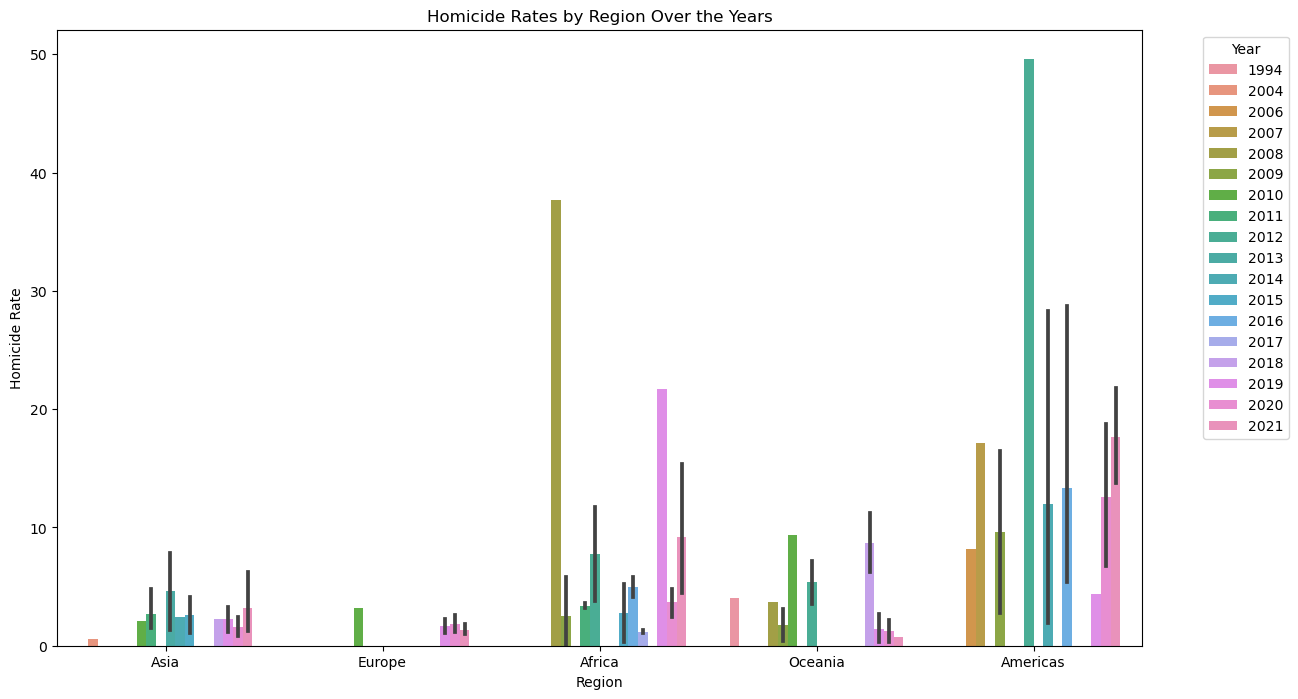

In [26]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=homicide_df, x='Region', y='Rate', hue='Year')
plt.title('Homicide Rates by Region Over the Years')
plt.xlabel('Region')
plt.ylabel('Homicide Rate')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**After seeing this Bar Plot, we can compare that that highest homicide rates are in "America". Whereas,  the second highest is in "Africa". In "Asia and "Oceania", homicide rates are comparatively same and in "Europe" rates are very low maongst all.**

## Box Plot

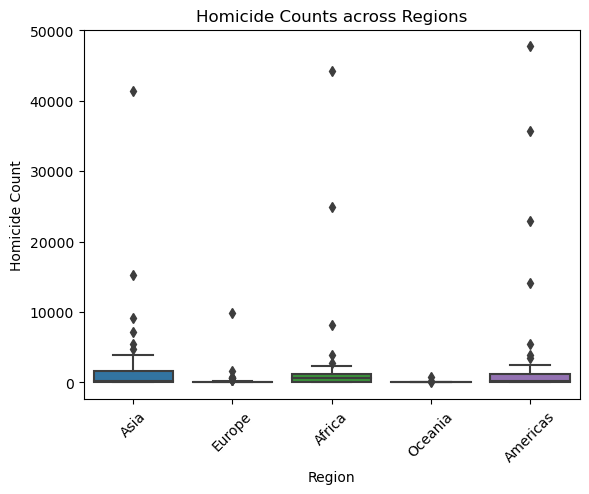

In [27]:

sns.boxplot(x='Region', y='Count', data=homicide_df)
plt.xlabel('Region')
plt.ylabel('Homicide Count')
plt.title('Homicide Counts across Regions')
plt.xticks(rotation=45)
plt.show()

**The code uses Seaborn to create a boxplot displaying homicide counts across regions from the DataFrame homicide_df. The x-axis represents regions, the y-axis represents homicide counts. The plot provides a visual overview of the distribution and potential variations in homicide counts. Labels and title enhance interpretability, and plt.show() displays the plot.**

## Bar Plot

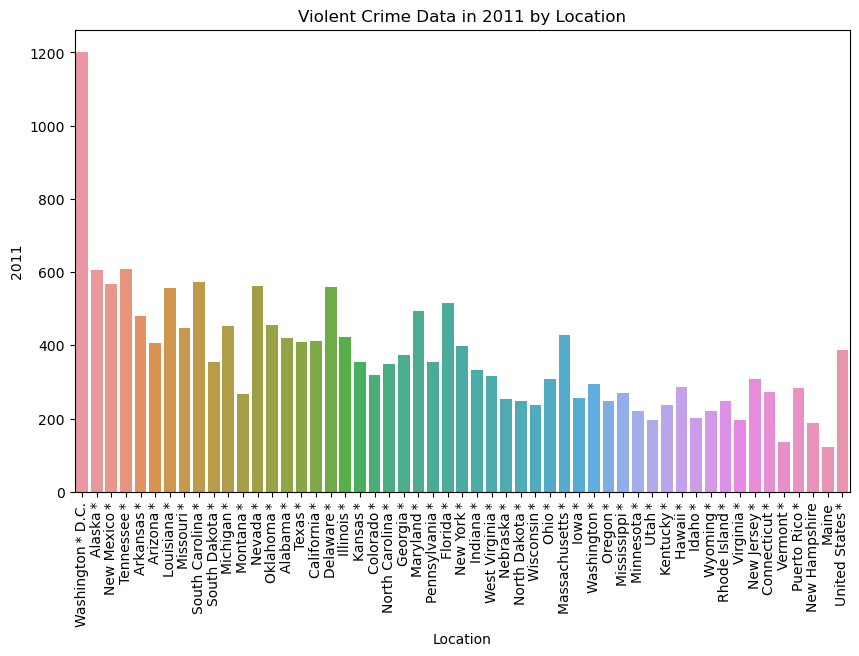

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='2011', data=violent_crime_df)
plt.title('Violent Crime Data in 2011 by Location')
plt.xticks(rotation=90)  # Rotate x labels for readability if needed
plt.show()


**Above Bar Plot comapres the city wise "Violent crime data in 2011" for all over USA. We can see that "Washington D.C" is having highest violence rate and "Maine" is having the lowest violence rate.**

## Line Graph

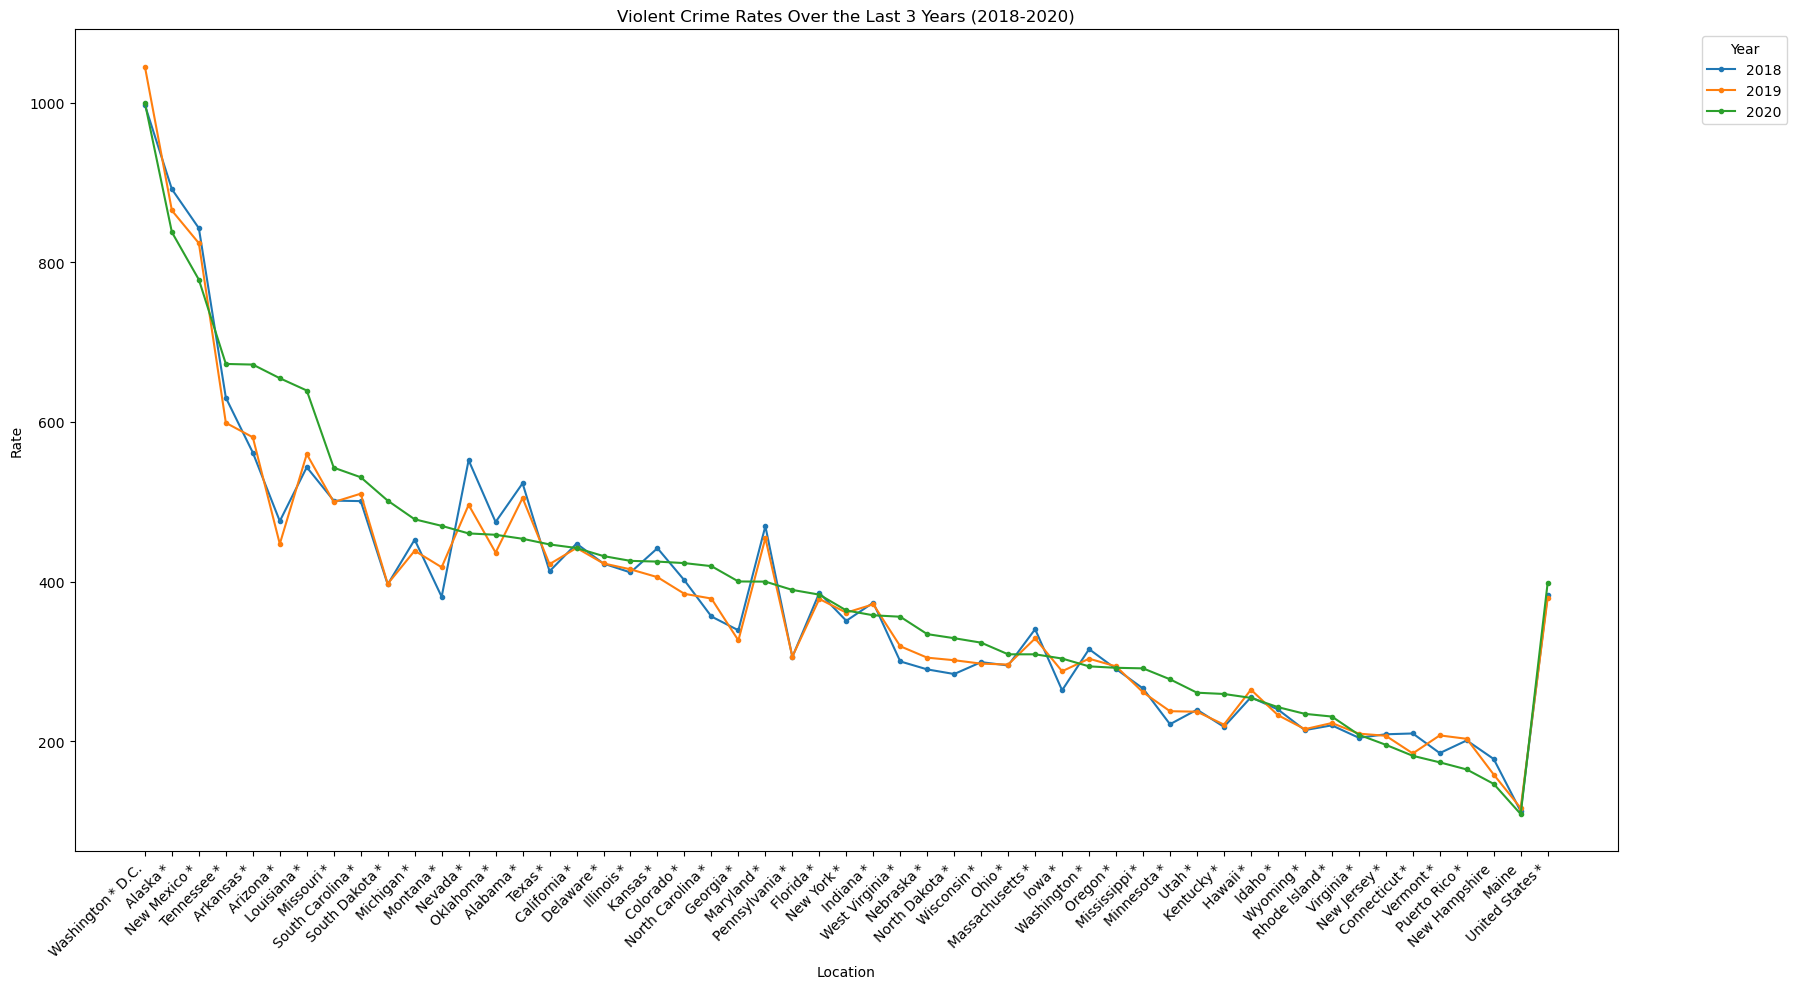

In [30]:
# Select the last 3 years
years_last_3 = [str(year) for year in range(2018, 2021)]

# Set up the figure and axes
plt.figure(figsize=(18, 10))

# Plotting line chart for the last 5 years
for year in years_last_3:
    plt.plot(violent_crime_df['Location'], violent_crime_df[year], label=year, marker='.')

# Adding labels and title
plt.title('Violent Crime Rates Over the Last 3 Years (2018-2020)')
plt.xlabel('Location')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


**A line chart using Matplotlib to visualize the trend in violent crime rates across different locations for the last 3 years (2018-2020). Each line represents a specific year, and markers indicate data points. The x-axis represents different locations, and the y-axis represents the crime rate. The plot includes labels, a title, and a legend to enhance interpretability. X-axis labels are rotated for better readability, and the chart is displayed with tight layout adjustments.**

## Correlation Heatmap Matrix

**A heatmap illustrating the correlation matrix for numeric columns in the homicide_df DataFrame. Non-numeric values are replaced with NaN. The heatmap provides a visual representation of pairwise correlations between variables, with annotations for correlation coefficients. The title 'Correlation Matrix for Homicide Data' adds context to the plot.**

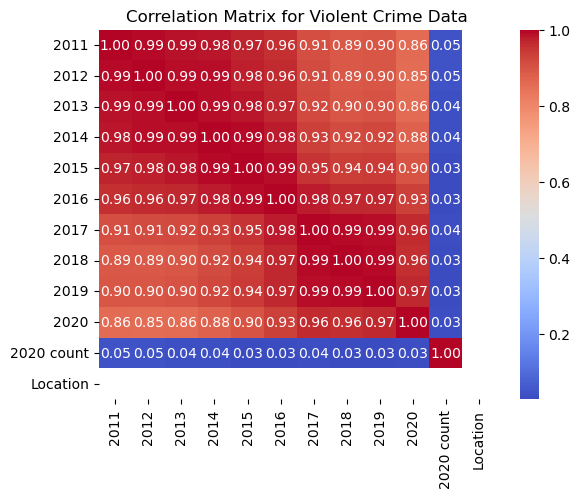

In [31]:
# Convert numeric columns to numeric, replace non-numeric values with NaN
violent_crime_df_numeric = violent_crime_df.apply(pd.to_numeric, errors='coerce')

# Create correlation matrix
corr_matrix_violent_crime = violent_crime_df_numeric.corr()

# Plot heatmap
sns.heatmap(corr_matrix_violent_crime, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Violent Crime Data')
plt.show()


**Visualizing the correlation matrix for numeric columns in the violent_crime_df DataFrame. It converts non-numeric values to NaN, calculates the correlation matrix, and then plots a heatmap with annotations, using a coolwarm color map and displaying correlation coefficients rounded to two decimal places. The title 'Correlation Matrix for Violent Crime Data' provides context for the plot.**

## Clusters

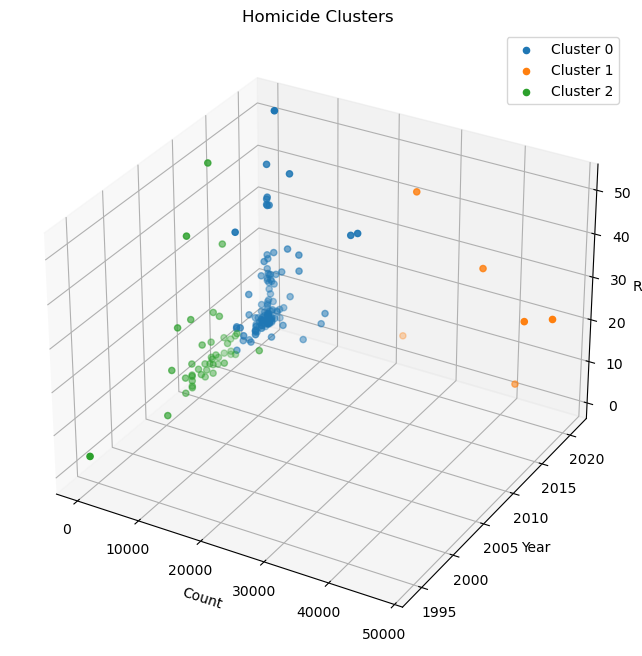

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select relevant columns for clustering
cluster_data = homicide_df[['Count', 'Year']]

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# number of clusters
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
homicide_df['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Create a 3D scatter plot
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(num_clusters):
    cluster_data_cluster = homicide_df[homicide_df['Cluster'] == cluster_label]
    ax.scatter(cluster_data_cluster['Count'], cluster_data_cluster['Year'], cluster_data_cluster['Rate'], label=f'Cluster {cluster_label}')

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Year')
ax.set_zlabel('Rate')
ax.set_title('Homicide Clusters')

# Add a legend
ax.legend()

# Show the plot
plt.show()


**Performs K-means clustering on homicide data using scikit-learn. It selects relevant columns ('Count' and 'Year'), standardizes the data, and applies K-means with three clusters. The clusters are visualized in a 3D scatter plot, where each point represents a data point in the space defined by homicide count, year, and rate. Each cluster is distinguished by color, and the plot includes labels and a legend for better interpretation.**

## Line Graph

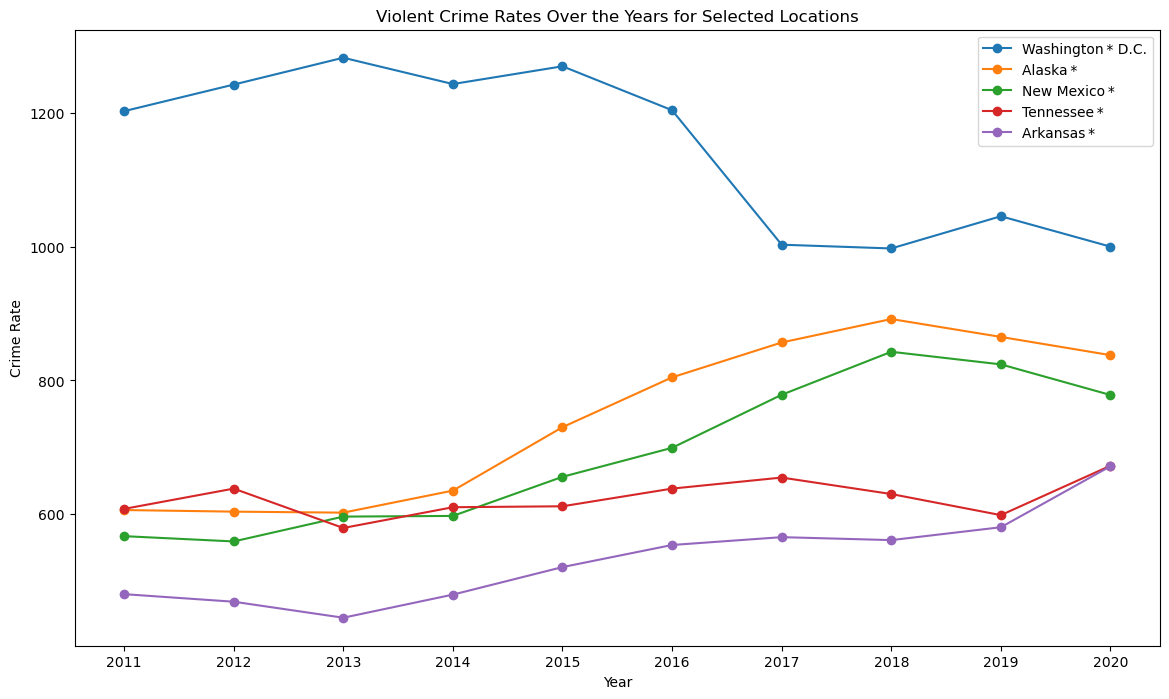

In [33]:
plt.figure(figsize=(14, 8))
for i in range(5):  # Plotting the first 5 locations for illustration
    location_data = violent_crime_df.iloc[i, 0:10]
    plt.plot(location_data.index, location_data.values, marker='o', label=violent_crime_df.loc[i, 'Location'])

plt.title('Violent Crime Rates Over the Years for Selected Locations')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()


## Predictive Model

In [34]:
from sklearn.linear_model import LinearRegression

# Features for prediction
features = ['Year', 'Count']

# Extracting features and target variable
X = homicide_df[features].values.reshape(-1, len(features))
y = homicide_df['Rate'].values

# Creating and fitting the model
model_homicide = LinearRegression()
model_homicide.fit(X, y)

# Predicting for the next year (2022)
prediction_homicide = model_homicide.predict([[2022, homicide_df['Count'].mean()]])
print(f"Predicted Homicide Rate for 2022: {prediction_homicide[0]}")


Predicted Homicide Rate for 2022: 6.4122269932294955


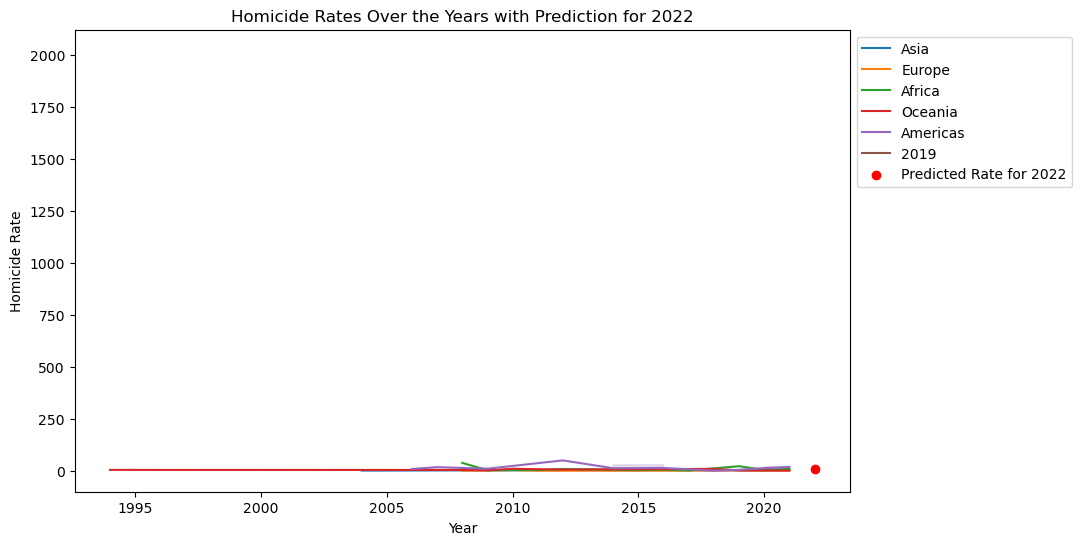

In [35]:
# Extend the dataset to include the prediction year (2022)
homicide_df_extended = homicide_df.copy()
homicide_df_extended.loc[len(homicide_df_extended)] = [2022, 2021, 2020, 2019, 2018, 2017, 2016]

# Predicting for the next year (2022)
prediction_homicide = model_homicide.predict([[2022, homicide_df['Count'].mean()]])

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rate', hue='Region', data=homicide_df_extended)
plt.scatter(2022, prediction_homicide[0], color='red', marker='o', label='Predicted Rate for 2022')
plt.title('Homicide Rates Over the Years with Prediction for 2022')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Predictive Model for USA Crime Distribution

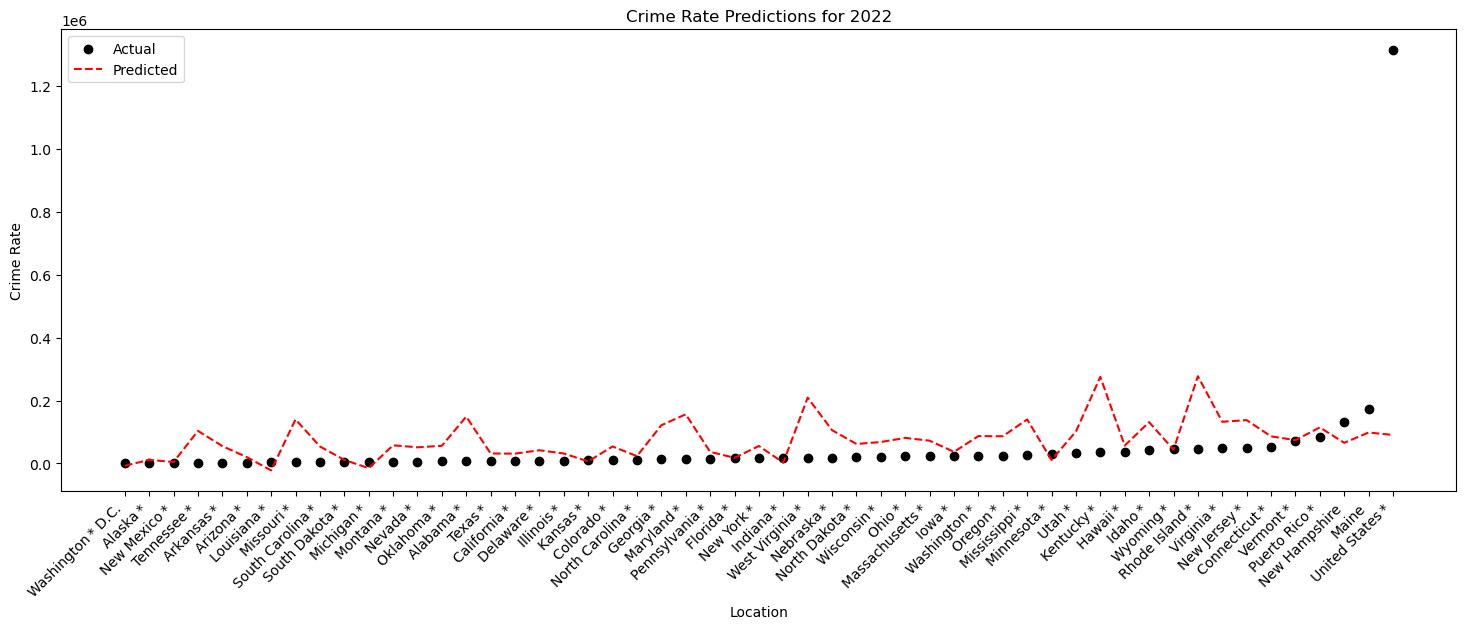

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('processed_violent_crime_data.csv') 

df = pd.DataFrame(data)

# Split the data into features and target variable
X = df.iloc[:, 0:10]
y = df['2020 count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for 2022
predictions_2022 = model.predict(df.iloc[:, 0:10])

# Sort the data by actual crime rates
sorted_indices = y.argsort()
actual_sorted = y.iloc[sorted_indices]
predictions_sorted = predictions_2022[sorted_indices]

# Visualize the predictions
plt.figure(figsize=(18, 6))
plt.scatter(df['Location'], actual_sorted, color='black', label='Actual',)
plt.plot(df['Location'], predictions_sorted, color='red', label='Predicted', linestyle='dashed')
plt.title('Crime Rate Predictions for 2022')
plt.xlabel('Location')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45, ha='right')  # Rotate labels at a 45-degree angle
plt.legend()
plt.show()


## Conclusion

In this project, we delved into a comprehensive analysis of intentional homicide rates and violent crime rates, leveraging data from diverse sources such as Wikipedia and the Firebase Realtime Database. Our primary goals were to uncover patterns, trends, and geographical distributions of these crime rates over time.

### Homicide Data Analysis:

- **Data Collection:** Intentional homicide rate data was sourced from a Wikipedia page and stored in a Firebase Realtime Database for convenient access.

- **Visualization:** Using the Dash framework and Plotly Express, we developed an interactive dashboard featuring diverse visualizations like bar charts, scatter plots, pie charts, maps, histograms, and animated bar charts. These visualizations provided a detailed exploration of homicide rates across regions, subregions, and years.

- **Insights:** Notable insights emerged regarding variations in homicide rates across regions and subregions, with the animated bar chart offering a dynamic view of the evolving rates.

### Violent Crime Data Analysis:

- **Data Collection:** Violent crime rate data for U.S. states and territories was collected from Wikipedia, cleaned, processed, and stored in a Firebase Realtime Database.

- **Dashboard Extension:** The dashboard was expanded to include a line chart displaying violent crime rates over the years for selected U.S. locations.

### Machine Learning Predictions:

- **Linear Regression Modeling:** We applied linear regression models to predict future crime rates based on historical data. This included predicting the homicide rate for 2022 and violent crime rates for U.S. locations.

- **Visualization of Predictions:** Predictions were visualized alongside actual crime rates, facilitating a clear comparison and aiding in understanding potential trends.

### Team Collaboration:

- **About Us Section:** To add a personal touch, we included an "About Us" section introducing team members with their respective images.

### Conclusion and Future Work:

- **Findings:** The project illuminated patterns and trends in intentional homicide and violent crime rates, offering valuable insights for policymakers, researchers, and the general public.

- **Future Work:** Future enhancements could include more advanced machine learning models for predictive analytics, incorporation of additional socio-economic factors, and an expansion of the geographical scope of analysis.

In conclusion, this project stands as a comprehensive exploration of crime rates, providing an interactive and insightful platform for users to understand and analyze the dynamics of intentional homicide and violent crime.


### YouTube Presentation Link
[Watch the Group Presentation on YouTube](https://www.youtube.com/watch?v=5E_I7tJXsh4)


### OneDrive Presentation Link
[View the Group Presentation on OneDrive](https://drive.google.com/file/d/1oC4C2WyYj-557508cXiDpLxMkggPM6Hd/view)
